In [ ]:
%matplotlib inline
from google.colab import files

import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd
 
from tensorflow import keras
import keras.backend as K
import tensorflow as tf
from keras.layers import Dense, Activation, Dropout

"""
file = files.upload()
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle
!kaggle datasets download -d sameepvani/nasa-nearest-earth-objects
!unzip nasa-nearest-earth-objects.zip
"""

'\nfile = files.upload()\n!mkdir ~/.kaggle\n!mv kaggle.json ~/.kaggle\n!kaggle datasets download -d sameepvani/nasa-nearest-earth-objects\n!unzip nasa-nearest-earth-objects.zip\n'

In [ ]:
df = pd.read_csv("neo.csv")
df = df.drop(columns='orbiting_body')
df = df.drop(columns='id')
df = df.drop(columns='name')

In [ ]:
x_train = df.to_numpy()
BUFFER_SIZE = x_train.shape[0]

In [ ]:
BATCH_SIZE = 32
BUFFER_SIZE = BUFFER_SIZE // BATCH_SIZE * BATCH_SIZE
BATCH_COUNT = BUFFER_SIZE // BATCH_SIZE
x_train = x_train[:BUFFER_SIZE]

In [ ]:
#генератор_1
generator_1 = tf.keras.Sequential()
generator_1.add(Dense(16, input_dim=7))
generator_1.add(Activation('relu'))
generator_1.add(Dense(32))
generator_1.add(Activation('relu'))
generator_1.add(Dense(64))
generator_1.add(Activation('relu'))
generator_1.add(Dense(7))
generator_1.add(Activation('relu'))

#генератор_2
generator_2 = tf.keras.Sequential()
generator_2.add(Dense(16, input_dim=7))
generator_2.add(Activation('relu'))
generator_2.add(Dense(32))
generator_2.add(Activation('relu'))
generator_2.add(Dense(64))
generator_2.add(Activation('relu'))
generator_2.add(Dense(128))
generator_2.add(Activation('relu'))
generator_2.add(Dense(7))
generator_2.add(Activation('relu'))

#генератор_3
generator_3 = tf.keras.Sequential()
generator_3.add(Dense(8, input_dim=7))
generator_3.add(Activation('relu'))
generator_3.add(Dense(16))
generator_3.add(Activation('relu'))
generator_3.add(Dense(32))
generator_3.add(Activation('relu'))
generator_3.add(Dense(7))
generator_3.add(Activation('relu'))

#генератор_4
generator_4 = tf.keras.Sequential()
generator_4.add(Dense(8, input_dim=7))
generator_4.add(Activation('relu'))
generator_4.add(Dense(16))
generator_4.add(Activation('relu'))
generator_4.add(Dense(32))
generator_4.add(Activation('relu'))
generator_4.add(Dense(64))
generator_4.add(Activation('relu'))
generator_4.add(Dense(7))
generator_4.add(Activation('relu'))

In [ ]:
#дискриминатор_1
discriminator_1 = tf.keras.Sequential()
discriminator_1.add(Dense(256, input_dim=7))
discriminator_1.add(Activation('relu'))
discriminator_1.add(Dense(128))
discriminator_1.add(Activation('relu'))
discriminator_1.add(Dense(64))
discriminator_1.add(Activation('relu'))
discriminator_1.add(Dense(1))
discriminator_1.add(Activation('sigmoid'))

#дискриминатор_2
discriminator_2 = tf.keras.Sequential()
discriminator_2.add(Dense(64, input_dim=7))
discriminator_2.add(Activation('relu'))
discriminator_2.add(Dense(32))
discriminator_2.add(Activation('relu'))
discriminator_2.add(Dense(16))
discriminator_2.add(Activation('relu'))
discriminator_2.add(Dense(1))
discriminator_2.add(Activation('sigmoid'))

#дискриминатор_3
discriminator_3 = tf.keras.Sequential()
discriminator_3.add(Dense(32, input_dim=7))
discriminator_3.add(Activation('relu'))
discriminator_3.add(Dense(16))
discriminator_3.add(Activation('relu'))
discriminator_3.add(Dense(1))
discriminator_3.add(Activation('sigmoid'))

#дискриминатор_4
discriminator_4 = tf.keras.Sequential()
discriminator_4.add(Dense(128, input_dim=7))
discriminator_4.add(Activation('relu'))
discriminator_4.add(Dense(64))
discriminator_4.add(Activation('relu'))
discriminator_4.add(Dense(32))
discriminator_4.add(Activation('relu'))
discriminator_4.add(Dense(1))
discriminator_4.add(Activation('sigmoid'))

In [ ]:
# потери
generator_loss = tf.keras.losses.BinaryCrossentropy()
discriminator_loss = tf.keras.losses.CategoricalCrossentropy()

def generator_loss_1(fake_output):
  loss = generator_loss(tf.ones_like(fake_output), fake_output)
  return loss

def generator_loss_2(fake_output):
  loss = generator_loss(tf.ones_like(fake_output), fake_output)
  return loss

def generator_loss_3(fake_output):
  loss = generator_loss(tf.ones_like(fake_output), fake_output)
  return loss

def generator_loss_4(fake_output):
  loss = generator_loss(tf.ones_like(fake_output), fake_output)
  return loss

def discriminator_loss_1(real_output, fake_output):
  real_loss = discriminator_loss(tf.ones_like(real_output), real_output)
  fake_loss = discriminator_loss(tf.zeros_like(fake_output), fake_output)
  total_loss = real_loss + fake_loss
  return total_loss

def discriminator_loss_2(real_output, fake_output):
  real_loss = discriminator_loss(tf.ones_like(real_output), real_output)
  fake_loss = discriminator_loss(tf.zeros_like(fake_output), fake_output)
  total_loss = real_loss + fake_loss
  return total_loss

def discriminator_loss_3(real_output, fake_output):
  real_loss = discriminator_loss(tf.ones_like(real_output), real_output)
  fake_loss = discriminator_loss(tf.zeros_like(fake_output), fake_output)
  total_loss = real_loss + fake_loss
  return total_loss

def discriminator_loss_4(real_output, fake_output):
  real_loss = discriminator_loss(tf.ones_like(real_output), real_output)
  fake_loss = discriminator_loss(tf.zeros_like(fake_output), fake_output)
  total_loss = real_loss + fake_loss
  return total_loss

In [ ]:
generator_optimizer_1 = tf.keras.optimizers.Adamax(1e-4)
generator_optimizer_2 = tf.keras.optimizers.Adam(1e-4)
generator_optimizer_3 = tf.keras.optimizers.Adamax(1e-4)
generator_optimizer_4 = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer_1 = tf.keras.optimizers.Adamax(1e-4)
discriminator_optimizer_2 = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer_3 = tf.keras.optimizers.Adamax(1e-4)
discriminator_optimizer_4 = tf.keras.optimizers.Adam(1e-4)

In [ ]:
# обучение
@tf.function
def train_step(images):
  noise = tf.random.normal([BATCH_SIZE//4, 7])

  with tf.GradientTape() as gen_tape_1, tf.GradientTape() as disc_tape_1, tf.GradientTape() as gen_tape_2, tf.GradientTape() as disc_tape_2, tf.GradientTape() as gen_tape_3, tf.GradientTape() as disc_tape_3, tf.GradientTape() as gen_tape_4, tf.GradientTape() as disc_tape_4:

    generated_samples_11 = generator_1(noise, training=True)
    generated_samples_12 = generator_1(noise, training=True)
    generated_samples_13 = generator_1(noise, training=True)
    generated_samples_14 = generator_1(noise, training=True)

    generated_samples_21 = generator_2(noise, training=True)
    generated_samples_22 = generator_2(noise, training=True)
    generated_samples_23 = generator_2(noise, training=True)
    generated_samples_24 = generator_2(noise, training=True)

    generated_samples_31 = generator_3(noise, training=True)
    generated_samples_32 = generator_3(noise, training=True)
    generated_samples_33 = generator_3(noise, training=True)
    generated_samples_34 = generator_3(noise, training=True)

    generated_samples_41 = generator_4(noise, training=True)
    generated_samples_42 = generator_4(noise, training=True) 
    generated_samples_43 = generator_4(noise, training=True) 
    generated_samples_44 = generator_4(noise, training=True)  

    real_output_1 = discriminator_1(images, training=True)
    real_output_2 = discriminator_2(images, training=True)
    real_output_3 = discriminator_3(images, training=True)
    real_output_4 = discriminator_4(images, training=True)

    fake_output_11 = discriminator_1(generated_samples_11, training=True)
    fake_output_12 = discriminator_1(generated_samples_21, training=True)
    fake_output_13 = discriminator_1(generated_samples_31, training=True)
    fake_output_14 = discriminator_1(generated_samples_41, training=True)

    fake_output_21 = discriminator_2(generated_samples_12, training=True)
    fake_output_22 = discriminator_2(generated_samples_22, training=True)
    fake_output_23 = discriminator_2(generated_samples_32, training=True)
    fake_output_24 = discriminator_2(generated_samples_42, training=True)

    fake_output_31 = discriminator_3(generated_samples_13, training=True)
    fake_output_32 = discriminator_3(generated_samples_23, training=True)
    fake_output_33 = discriminator_3(generated_samples_33, training=True)
    fake_output_34 = discriminator_3(generated_samples_43, training=True)

    fake_output_41 = discriminator_4(generated_samples_14, training=True)
    fake_output_42 = discriminator_4(generated_samples_24, training=True)
    fake_output_43 = discriminator_4(generated_samples_34, training=True)
    fake_output_44 = discriminator_4(generated_samples_44, training=True)

    gen_loss_1 = generator_loss_1(tf.concat([fake_output_11, fake_output_21, fake_output_31, fake_output_41], axis=0))
    gen_loss_2 = generator_loss_2(tf.concat([fake_output_12, fake_output_22, fake_output_32, fake_output_42], axis=0))
    gen_loss_3 = generator_loss_3(tf.concat([fake_output_13, fake_output_23, fake_output_33, fake_output_43], axis=0))
    gen_loss_4 = generator_loss_4(tf.concat([fake_output_14, fake_output_24, fake_output_34, fake_output_44], axis=0))

    disc_loss_1 = discriminator_loss_1(real_output_1, tf.concat([fake_output_11, fake_output_12, fake_output_13, fake_output_14], axis=0))
    disc_loss_2 = discriminator_loss_2(real_output_2, tf.concat([fake_output_21, fake_output_22, fake_output_23, fake_output_24], axis=0))
    disc_loss_3 = discriminator_loss_3(real_output_3, tf.concat([fake_output_31, fake_output_32, fake_output_33, fake_output_34], axis=0))
    disc_loss_4 = discriminator_loss_4(real_output_4, tf.concat([fake_output_41, fake_output_42, fake_output_43, fake_output_44], axis=0))

  gradients_of_generator_1 = gen_tape_1.gradient(gen_loss_1, generator_1.trainable_variables)
  gradients_of_generator_2 = gen_tape_2.gradient(gen_loss_2, generator_2.trainable_variables)
  gradients_of_generator_3 = gen_tape_3.gradient(gen_loss_3, generator_3.trainable_variables)
  gradients_of_generator_4 = gen_tape_4.gradient(gen_loss_4, generator_4.trainable_variables)

  gradients_of_discriminator_1 = disc_tape_1.gradient(disc_loss_1, discriminator_1.trainable_variables)
  gradients_of_discriminator_2 = disc_tape_2.gradient(disc_loss_2, discriminator_2.trainable_variables) 
  gradients_of_discriminator_3 = disc_tape_3.gradient(disc_loss_3, discriminator_3.trainable_variables)
  gradients_of_discriminator_4 = disc_tape_4.gradient(disc_loss_4, discriminator_4.trainable_variables)

  generator_optimizer_1.apply_gradients(zip(gradients_of_generator_1, generator_1.trainable_variables))
  generator_optimizer_2.apply_gradients(zip(gradients_of_generator_2, generator_2.trainable_variables))
  generator_optimizer_3.apply_gradients(zip(gradients_of_generator_3, generator_3.trainable_variables))
  generator_optimizer_4.apply_gradients(zip(gradients_of_generator_4, generator_4.trainable_variables))

  discriminator_optimizer_1.apply_gradients(zip(gradients_of_discriminator_1, discriminator_1.trainable_variables))
  discriminator_optimizer_2.apply_gradients(zip(gradients_of_discriminator_2, discriminator_2.trainable_variables))
  discriminator_optimizer_3.apply_gradients(zip(gradients_of_discriminator_3, discriminator_3.trainable_variables))
  discriminator_optimizer_4.apply_gradients(zip(gradients_of_discriminator_4, discriminator_4.trainable_variables))

  return gen_loss_1, gen_loss_2, gen_loss_3, gen_loss_4, disc_loss_1, disc_loss_2, disc_loss_3, disc_loss_4

In [ ]:
def train(dataset, epochs):
  history_1 = []
  history_2 = []
  history_3 = []
  history_4 = []

  MAX_PRINT_LABEL = 10
  th = BUFFER_SIZE // (BATCH_SIZE*MAX_PRINT_LABEL)
  for epoch in range(1, epochs+1):
    print(f'{epoch}/{EPOCHS}: ', end='')

    start = time.time()
    n = 0

    gen_loss_epoch_1 = 0
    gen_loss_epoch_2 = 0
    gen_loss_epoch_3 = 0
    gen_loss_epoch_4 = 0
    cur_record = 0
    for i in range(BATCH_COUNT):
      image_batch = tf.convert_to_tensor(dataset[cur_record:cur_record+BATCH_SIZE], tf.float32)
      gen_loss_1, gen_loss_2, gen_loss_3, gen_loss_4, disc_loss_1, disc_loss_2, disc_loss_3, disc_loss_4 = train_step(image_batch)
      gen_loss_epoch_1 += K.mean(gen_loss_1)
      gen_loss_epoch_2 += K.mean(gen_loss_2)
      gen_loss_epoch_3 += K.mean(gen_loss_3)
      gen_loss_epoch_4 += K.mean(gen_loss_4)

      if( n % th == 0): print('=', end='')
      n += 1

    history_1 += [gen_loss_epoch_1/n]
    history_2 += [gen_loss_epoch_2/n]
    history_3 += [gen_loss_epoch_3/n]
    history_4 += [gen_loss_epoch_4/n]

    print(': '+str(history_1[-1]))
    print ('Время эпохи {} составляет {} секунд'.format(epoch + 1, time.time()-start))
  
  return history_1, history_2, history_3, history_4

In [ ]:
# запуск процесса обучения
EPOCHS = 4
history_1, history_2, history_3, history_4 = train(x_train, EPOCHS)

1/4: ===========: tf.Tensor(0.43521932, shape=(), dtype=float32)
Время эпохи 2 составляет 54.38975524902344 секунд
2/4: ===========: tf.Tensor(0.014668963, shape=(), dtype=float32)
Время эпохи 3 составляет 31.61688995361328 секунд
3/4: ===========: tf.Tensor(0.00018193555, shape=(), dtype=float32)
Время эпохи 4 составляет 32.05517840385437 секунд
4/4: ===========: tf.Tensor(5.9149197e-06, shape=(), dtype=float32)
Время эпохи 5 составляет 30.05879306793213 секунд


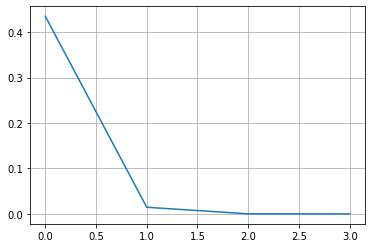

In [ ]:
plt.plot(history_1)
plt.grid(True)

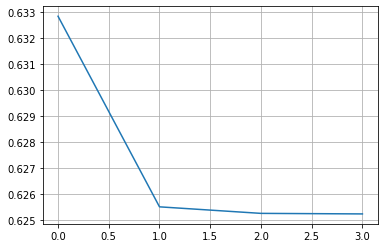

In [ ]:
plt.plot(history_2)
plt.grid(True)

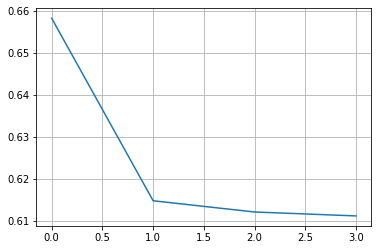

In [ ]:
plt.plot(history_3)
plt.grid(True)

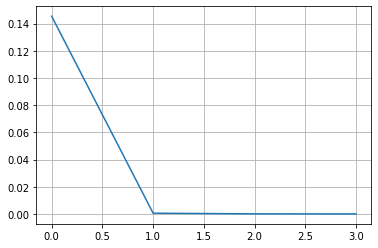

In [ ]:
plt.plot(history_4)
plt.grid(True)

In [ ]:
history_3

[<tf.Tensor: shape=(), dtype=float32, numpy=0.6583108>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.6147771>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.6120934>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.61116064>]

In [ ]:
history_1

[<tf.Tensor: shape=(), dtype=float32, numpy=0.43521932>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.014668963>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.00018193555>,
 <tf.Tensor: shape=(), dtype=float32, numpy=5.9149197e-06>]

In [ ]:
history_2

[<tf.Tensor: shape=(), dtype=float32, numpy=0.632841>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.62550074>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.6252491>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.62522817>]

In [ ]:
history_4

[<tf.Tensor: shape=(), dtype=float32, numpy=0.14543353>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.0005301034>,
 <tf.Tensor: shape=(), dtype=float32, numpy=5.1683513e-05>,
 <tf.Tensor: shape=(), dtype=float32, numpy=7.930187e-06>]